In [1]:
import numpy as np
np.random.seed(42)

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import activations
from keras import initializers
from keras import callbacks

import matplotlib.pyplot as plt

# To set the color used to display monochrome images.
plt.rcParams['image.cmap'] = 'Blues'

### Load data 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width, img_height = x_train[0].shape
#Reshape into n x 28 x 28 x 1:
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, 1)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, 1)

#### Image number 25081

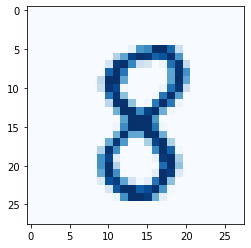

In [3]:
plt.imshow(x_train[25081,:,:,0]/255)

### Turn targets into one-hot vectors:

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[25081]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### Define the Convolutional network No. 1

In [5]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = keras.models.Sequential()
model.add(Conv2D(20, input_shape=(img_width, img_height, 1), kernel_size=(5,5),
                 strides=(1,1), activation='relu', padding='same',
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu', 
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

num_classes = 10
model.add(Dense(units=num_classes, activation='softmax', 
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

# model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.01, momentum=0.9),
#               run_eagerly=True,
              metrics=['accuracy'])

trained_model= model.fit(x_train, y_train,
              batch_size=8192,
              epochs=60, verbose=1,
              validation_data=(x_test, y_test),
              shuffle=True, validation_freq=30,
              callbacks = [early_stopping])

Epoch 1/60
8/8 [==============================] - 3s 428ms/step - loss: 3.7532 - accuracy: 0.3936
Epoch 2/60
8/8 [==============================] - 4s 518ms/step - loss: 2.3025 - accuracy: 0.1186
Epoch 3/60
8/8 [==============================] - 4s 461ms/step - loss: 2.1219 - accuracy: 0.1996
Epoch 4/60
8/8 [==============================] - 4s 482ms/step - loss: 1.2823 - accuracy: 0.5824
Epoch 5/60
8/8 [==============================] - 4s 446ms/step - loss: 0.6416 - accuracy: 0.7922
Epoch 6/60
8/8 [==============================] - 4s 484ms/step - loss: 0.4169 - accuracy: 0.8730
Epoch 7/60
8/8 [==============================] - 4s 477ms/step - loss: 0.3047 - accuracy: 0.9092
Epoch 8/60
8/8 [==============================] - 4s 464ms/step - loss: 0.2232 - accuracy: 0.9358
Epoch 9/60
8/8 [==============================] - 4s 477ms/step - loss: 0.1727 - accuracy: 0.9489
Epoch 10/60
8/8 [==============================] - 3s 422ms/step - loss: 0.1436 - accuracy: 0.9574
Epoch 11/60
8/8 [==

8/8 [==============================] - 3s 428ms/step - loss: 0.0383 - accuracy: 0.9880
Epoch 28/60
8/8 [==============================] - 3s 403ms/step - loss: 0.0355 - accuracy: 0.9893
Epoch 29/60
8/8 [==============================] - 4s 461ms/step - loss: 0.0349 - accuracy: 0.9890
Epoch 30/60
8/8 [==============================] - 4s 472ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0957 - val_accuracy: 0.9746
Epoch 31/60
8/8 [==============================] - 3s 429ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 32/60
8/8 [==============================] - 4s 459ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 33/60
8/8 [==============================] - 4s 497ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 34/60
8/8 [==============================] - 3s 409ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 35/60
8/8 [==============================] - 3s 423ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 36/60
8/8 [==============================] - 3s 419ms/step - loss: 0.0224

Epoch 55/60
8/8 [==============================] - 4s 438ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 56/60
8/8 [==============================] - 4s 439ms/step - loss: 0.0077 - accuracy: 0.9980
Epoch 57/60
8/8 [==============================] - 4s 442ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 58/60
8/8 [==============================] - 4s 440ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 59/60
8/8 [==============================] - 3s 417ms/step - loss: 0.0093 - accuracy: 0.9974
Epoch 60/60
8/8 [==============================] - 4s 449ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0984 - val_accuracy: 0.9792


In [6]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 11s 37ms/step - loss: 0.0984 - accuracy: 0.9792


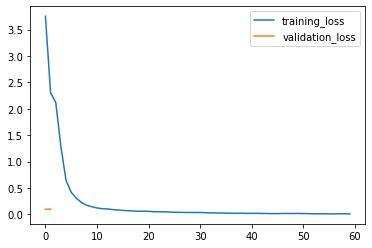

In [7]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])

### Define the convolutional network No. 2

In [8]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model2 = keras.models.Sequential()
model2.add(Conv2D(20, input_shape=(img_width, img_height, 1),
                 kernel_size=(3,3), strides=(1,1), padding='same', 
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))
model2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model2.add(Conv2D(30,
                 kernel_size=(3,3), strides=(1,1), padding='same', 
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))
model2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model2.add(Conv2D(50,
                 kernel_size=(3,3), strides=(1,1), padding='same', 
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))

model2.add(Flatten())
num_classes = 10
model2.add(Dense(units=num_classes, activation='softmax', 
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

# model.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.01, momentum=0.9),
#               run_eagerly=True,
              metrics=['accuracy'])

trained_model2= model2.fit(x_train, y_train,
              batch_size=8192,
              epochs=30, verbose=1,
              validation_data=(x_test, y_test),
              shuffle=True, validation_freq=30,
              callbacks = [early_stopping])

Epoch 1/30
8/8 [==============================] - 12s 1s/step - loss: 1.4982 - accuracy: 0.6113
Epoch 2/30
8/8 [==============================] - 13s 2s/step - loss: 0.3847 - accuracy: 0.9038
Epoch 3/30
8/8 [==============================] - 12s 2s/step - loss: 0.2146 - accuracy: 0.9388
Epoch 4/30
8/8 [==============================] - 13s 2s/step - loss: 0.1590 - accuracy: 0.9543
Epoch 5/30
8/8 [==============================] - 12s 2s/step - loss: 0.1292 - accuracy: 0.9635
Epoch 6/30
8/8 [==============================] - 12s 2s/step - loss: 0.1110 - accuracy: 0.9686
Epoch 7/30
8/8 [==============================] - 13s 2s/step - loss: 0.0982 - accuracy: 0.9722
Epoch 8/30
8/8 [==============================] - 13s 2s/step - loss: 0.0892 - accuracy: 0.9754
Epoch 9/30
8/8 [==============================] - 12s 2s/step - loss: 0.0830 - accuracy: 0.9770
Epoch 10/30
8/8 [==============================] - 13s 2s/step - loss: 0.0776 - accuracy: 0.9787
Epoch 11/30
8/8 [======================

Epoch 28/30
8/8 [==============================] - 12s 2s/step - loss: 0.0463 - accuracy: 0.9872
Epoch 29/30
8/8 [==============================] - 13s 2s/step - loss: 0.0456 - accuracy: 0.9874
Epoch 30/30
8/8 [==============================] - 13s 2s/step - loss: 0.0434 - accuracy: 0.9882 - val_loss: 0.3372 - val_accuracy: 0.9786


In [9]:
score = model.evaluate(x_test, y_test, verbose=2)

313/313 - 11s - loss: 0.0984 - accuracy: 0.9792


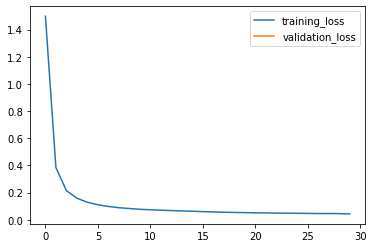

In [11]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])